In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os

In [2]:
array = []
files = os.listdir('./data')
for file in files:
    if "Attent" in file:
        df = pd.read_csv('./data/' +file)
        data = df.values[0]
        assert len(data) == 9, f"{data}"
        array.append(data)

In [3]:
array = np.array(array)
array.shape

(746, 9)

In [4]:
final_result = np.sum(array, axis = 0 )
normalized = final_result / sum(final_result)

In [5]:
cols = df.keys()

In [6]:
normalized

array([0.03639509, 0.17564344, 0.1212948 , 0.02087011, 0.25859515,
       0.05386808, 0.05373319, 0.17595265, 0.10364749])

In [7]:
final_stats = pd.DataFrame([ normalized], columns = cols)
final_stats.to_csv("Normlized_stats.csv", index = False)

Text(0.5, 1.0, 'normalized attention across entire eval episode')

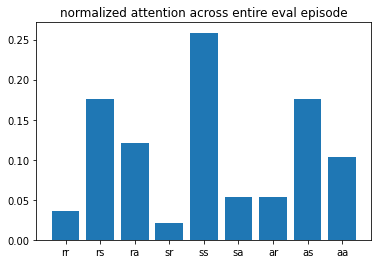

In [8]:
fig, axes = plt.subplots()
plt.bar(cols, normalized )
axes.set_title("normalized attention across entire eval episode")

In [12]:
final_stats

,rr,rs,ra,sr,ss,sa,ar,as,aa
0,0.036395,0.175643,0.121295,0.02087,0.258595,0.053868,0.053733,0.175953,0.103647


In [18]:
new_stats = pd.DataFrame()
new_stats['rr'] = final_stats['rr']
new_stats['ss'] = final_stats['ss'] 
new_stats['aa'] = final_stats['aa'] 
new_stats['as'] = final_stats['as'] + final_stats['sa']
new_stats['rs'] = final_stats['rs'] + final_stats['sr']
new_stats['ar'] = final_stats['ar'] + final_stats['ra']
new_stats

,rr,ss,aa,as,rs,ar
0,0.036395,0.258595,0.103647,0.229821,0.196514,0.175028


In [22]:
new_stats.values.sum()

0.9999999999999999